In [1]:
#Load Libraries
import re
import string
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
from tqdm.auto import tqdm
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import nlpaug.augmenter.word.context_word_embs as aug

#Load Data
df = pd.read_csv('C:/Users/danie/Desktop/Capstone/Dataset/dataset5.csv')
display(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,tags
0,invoice tabratas tharom ismayoeddin,Travelling Expenses
1,print label,Courier & Postage
2,computer usage,Printing. Stationery & Periodicals
3,lavender callons tesco,Staff Welfare
4,hotel badri grabd pink hatyai,Accomodation
...,...,...
102405,['2007 pc mbs roadmax ii additional insurance ...,Motor Vehicle Insurance & Road Tax
102406,['for pc of mbs roadmax additional life insura...,Motor Vehicle Insurance & Road Tax
102407,['data emma jpj provides roadtax ddc and add d...,Motor Vehicle Insurance & Road Tax
102408,['pc mbs data roadmax additional credit insura...,Motor Vehicle Insurance & Road Tax


<AxesSubplot:>

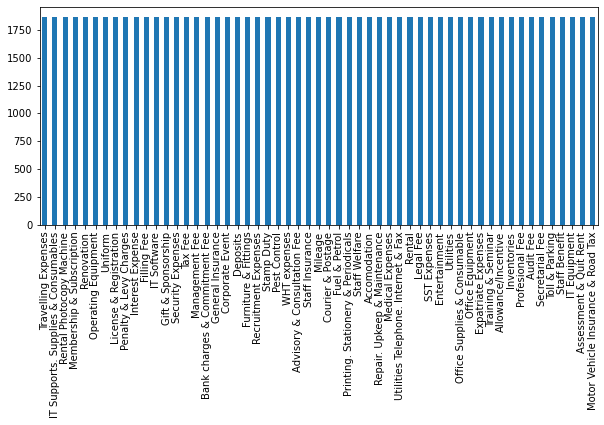

In [2]:
#Class Distribution
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar')

In [3]:
#Check Class Balance
df['tags'].value_counts()

Travelling Expenses                    1862
IT Supports. Supplies & Consumables    1862
Rental Photocopy Machine               1862
Membership & Subscription              1862
Renovation                             1862
Operating Equipment                    1862
Uniform                                1862
License & Registration                 1862
Penalty & Levy Charges                 1862
Interest Expense                       1862
Filling Fee                            1862
IT Software                            1862
Gift & Sponsorship                     1862
Security Expenses                      1862
Tax Fee                                1862
Management Fee                         1862
Bank charges & Commitment Fee          1862
General Insurance                      1862
Corporate Event                        1862
Deposits                               1862
Furniture & Fittings                   1862
Recruitment Expenses                   1862
Stamp Duty                      

In [4]:
#before preprocessing
def print_plot(index):
    example = df[df.index == index][['description', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('tags:', example[1])
print_plot(4500)

digital river ireland adobe creative cloud membership
tags: Membership & Subscription


In [5]:
#after preprocessing
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) #single character removal
    text = re.sub(r'\s+', ' ', text) #remove multiple spaces 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['description'] = df['description'].apply(clean_text)
df['description'] = df['description'].str.replace('\d+', "")
print_plot(4500)

C:\Users\danie\AppData\Local\Temp\ipykernel_652\1648839023.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('\d+', "")


digital river ireland adobe creative cloud membership
tags: Membership & Subscription


In [6]:
df.to_csv(r'C:\Users\danie\Desktop\Capstone\Dataset\dataset5_prep.csv', index=False)